## Mean Squared Error (MSE)
Hands-on activity with data and real cost function  
Editor: Saeid SHARIFY  
Date: 2021/08/08  

#### The formula: 

$RSS = \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$  
$MSE = \frac {1}{n} \sum_{i=1}^{n} \big(y^{(i)} - h_\theta x^{(i)} \big)^2$  
  
  
An alternative representation of the MSE:

$MSE = \frac {1}{n} \sum_{i=1}^{n} \big(y - \hat{y} \big)^2$  

When dealing with large numbers and big datasets, we might encounter the overflow error. This is where the MSE comes to help, by deviding by the number of samples, and taking an average (mean), we can hanlde very large datasets.  


#### Imports and Packages


In [143]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
%matplotlib inline

#### Linear Regression

In [144]:
# generating some data sample and reshape them into two dimensional arrays
x = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)
print(x.shape, y.shape)

(7, 1) (7, 1)


In [145]:
# linear regression
regr = LinearRegression()
regr.fit(x,y)
Theta_0 = regr.intercept_[0]
Theta_1 = regr.coef_[0][0]

## Visualization

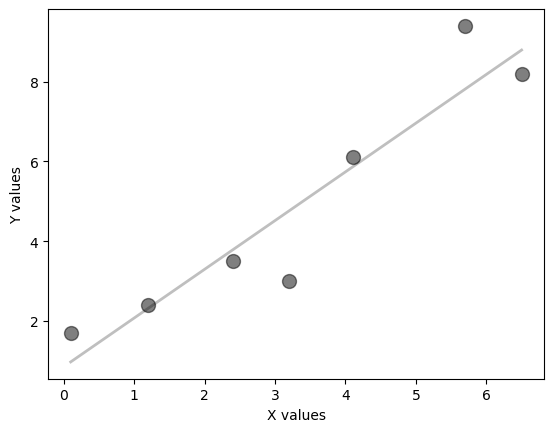

In [153]:
plt.scatter(x,y, s=100, alpha= 0.5, color='black')
plt.plot(x, regr.predict(x), color='black', linewidth = 2, alpha = 0.25)
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

#### Looking into the MSE Cost Function

In [154]:
# y_hat = theta0 + theta1*x
y_hat = Theta_0 + Theta_1 * x
print('Estimated values for y_hat: \n', y_hat)
print('---- ---- ---- ----')
print('Actual y values: \n', y)

Estimated values for y_hat: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
---- ---- ---- ----
Actual y values: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


#### Writhing the function to calculate the MSE

In [155]:
# translating the MSE formula into the Python code
def mse(y, y_hat):
    # Alternative: mmo = 1/y.size * sum((y - y_hat**2))
    mmo = np.average((y - y_hat)**2, axis=0) # axis = 0 sums up the rows
    return mmo

mse(y, y_hat)

array([0.94796558])

In [156]:
# lets check the outputs for MSE
print('Manual MSE calculated is: ', mse(y, y_hat))
print('MSE regression with manual calculation is: ', mean_squared_error(y, y_hat))
print('MSE regression using ML package is: ', mean_squared_error(y, regr.predict(x)))

Manual MSE calculated is:  [0.94796558]
MSE regression with manual calculation is:  0.9479655759794577
MSE regression using ML package is:  0.9479655759794577


#### Setting up 3D visualization for the MSE Cost Function

In [162]:
# generate some data

# 1 dimensional arrays
num_tht = 256
tht_0 = np.linspace(start=-1, stop=3, num=num_tht)
tht_1 = np.linspace(start=-1, stop=3, num=num_tht)

# 2 dimensional array for 3D plots
p_tht_0, p_tht_1 = np.meshgrid(tht_0, tht_1)

#### Using Nested for Loops 

In [163]:
pl_cost = np.zeros((num_tht,num_tht)) # mapping a 2 dimensional surface of zeros
pl_cost

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [164]:
# basic nested loops // using two for loops
for i in range(3):
    for j in range(3):
        print(i,'< i ---- j >',j)
        #print(f'value of i is {i} and j is {j}')

0 < i ---- j > 0
0 < i ---- j > 1
0 < i ---- j > 2
1 < i ---- j > 0
1 < i ---- j > 1
1 < i ---- j > 2
2 < i ---- j > 0
2 < i ---- j > 1
2 < i ---- j > 2


In [165]:
# pl_cost = np.zeros((num_tht,num_tht)) # mapping a 2 dimensional surface of zeros

print('Printing out all values stored in the theta matrix: ')
for i in range(num_tht):
    for j in range(num_tht):
        y_hat = p_tht_0[i][j] + p_tht_1[i][j]*x
        pl_cost[i][j] = mse(y,y_hat)
        
print('Shape of p_tht_0: ', p_tht_0.shape)
print('Shape of p_tht_1: ', p_tht_1.shape)
print('Shape of pl_cost: ', pl_cost.shape)

Printing out all values stored in the theta matrix: 
Shape of p_tht_0:  (256, 256)
Shape of p_tht_1:  (256, 256)
Shape of pl_cost:  (256, 256)


#### 3D visualization

/tmp/ipykernel_8467/3777781414.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axx = viz.gca(projection='3d')


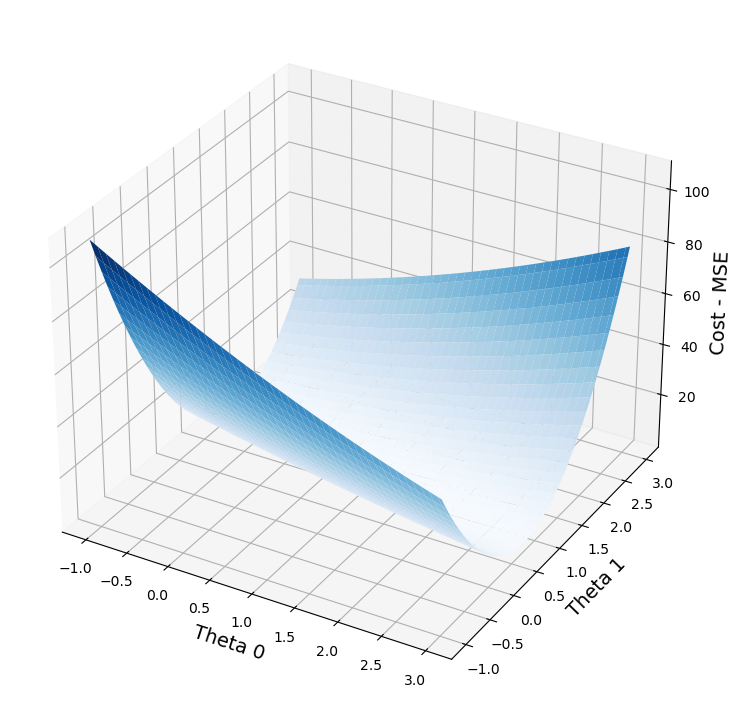

In [166]:
viz = plt.figure(figsize=[16,9])
axx = viz.gca(projection='3d')
axx.set_xlabel('Theta 0', fontsize=14)
axx.set_ylabel('Theta 1', fontsize=14)
axx.set_zlabel('Cost - MSE ', fontsize=14)

axx.plot_surface(p_tht_0, p_tht_1, pl_cost, cmap=cm.Blues)
plt.show()

#### Locating the minimum cost on the surface

In [142]:
print('Minimum cost: ', pl_cost.min())

# assiciated theta values with this cost:
surface_min = np.unravel_index(pl_cost.argmin(), pl_cost.shape)
print('Minimum cost is located at: ', surface_min)
print('Min MSE for Tht0 at (142, 117): ', p_tht_0[142][117])
print('Min MSE for Tht1 at (142, 117): ', p_tht_1[142][117])


Minimum cost:  0.9480796396990174
Minimum cost is located at:  (142, 117)
Min MSE for Tht0 at (142, 117):  0.8352941176470587
Min MSE for Tht1 at (142, 117):  1.227450980392157


#### Partial Derivative of MSE with respect to $\theta_0$ and $\theta_1$
$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^n \big( Y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$

$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^n \big( Y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$

